In [1]:
import librosa

In [2]:
#音声認識の基礎
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

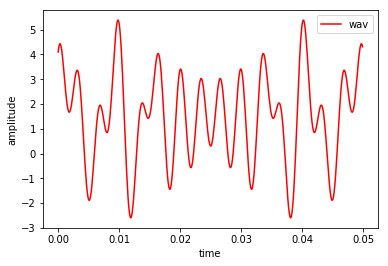

In [3]:
#信号の形成
#４つの正弦波を足し合わせてプロット
fs=8820.0
time=np.arange(0.0,0.05,1/fs)
sinwav1=1.2*np.sin(2*np.pi*130*time)#振幅1.2,振動数130
coswav1=0.9*np.cos(2*np.pi*200*time)#振幅0.9,振動数200
sinwav2=1.4*np.sin(2*np.pi*150*time)#振幅1.4,振動数150
coswav2=1.8*np.cos(2*np.pi*300*time)#振幅1.8,振動数300

wavdata=1.4+(sinwav1+sinwav2+coswav1+coswav2)

plt.plot(time,wavdata,c='red',label='wav')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend(loc='best')
plt.show()


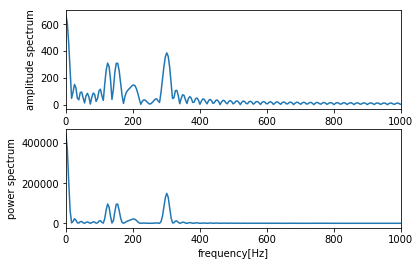

In [4]:
#フーリエ変換をしてスペクトル分解
#FFTのサンプル周波数
n=2048
dft=np.fft.fft(wavdata,n)

#振幅スペクトル
Adft=np.abs(dft)
#パワースペクトル
Pdft=np.abs(dft)**2
#周波数スケール
fscale=np.fft.fftfreq(n,d=1.0/fs)

#振幅スペクトルを描画
plt.subplot(2,1,1)
plt.plot(fscale[0:int(n/2)],Adft[0:int(n/2)])
plt.xlabel('frequency[Hx]')
plt.ylabel('amplitude spectrum')
plt.xlim(0,1000)

#power spectrum
plt.subplot(2,1,2)
plt.plot(fscale[0:int(n/2)],Pdft[0:int(n/2)])
plt.xlabel('frequency[Hz]')
plt.ylabel('power spectrum')
plt.xlim(0,1000)

plt.show()

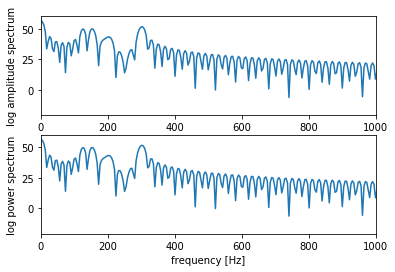

In [5]:
#対数スペクトル
plt.subplot(2,1,1)
plt.plot(fscale[0:int(n/2)],20*np.log10(Adft[0:int(n/2)]))
plt.xlabel('frequency[Hz]')
plt.ylabel('log amplitude spectrum')
plt.xlim(0,1000)

plt.subplot(2,1,2)
plt.plot(fscale[0:int(n/2)],10*np.log10(Pdft[0:int(n/2)]))
plt.xlabel('frequency [Hz]')
plt.ylabel('log power spectrum')
plt.xlim(0,1000)

plt.show()

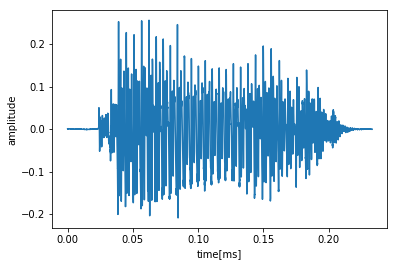

In [30]:
import wave
import numpy as np
import pydub
import codecs
#波形を読む関数
def wavread(fname):
    wf=wave.open(fname,'r')
    fs=wf.getframerate()
    x=wf.readframes(wf.getnframes())
    x=np.frombuffer(x,dtype='int16')/32768.0
    wf.close()
    return x,float(fs)

if __name__=='__main__':
    wav,fs=wavread('a.wav')
    time=np.arange(0,len(wav)/fs,1/fs)
    plt.plot(time,wav)
    plt.xlabel('time[ms]')
    plt.ylabel('amplitude')
    plt.show()
    

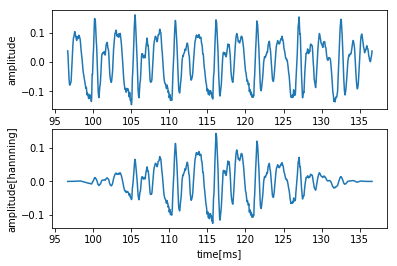

In [31]:
#母音の定常部分のスペクトル
center=int(len(wav)/2)
cuttime=0.04

wavdata=wav[int(center-cuttime/2*fs):int(center+cuttime/2*fs)]
time=time[int(center-cuttime/2*fs):int(center+cuttime/2*fs)]

plt.subplot(2,1,1)
plt.plot(time*1000,wavdata)
plt.xlabel('time[ms]')
plt.ylabel('amplitude')

#hanningwindow
hanningwindow=np.hanning(len(wavdata))
wavdata=hanningwindow*wavdata

plt.subplot(2,1,2)
plt.plot(time*1000,wavdata)
plt.xlabel('time[ms]')
plt.ylabel('amplitude[hannning]')

plt.show()

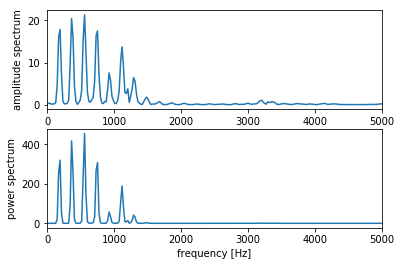

In [33]:
#窓関数をかけた関数をかけた波形
n=2048
dft=np.fft.fft(wavdata,n)
Adft=np.abs(dft)
Pdft=np.abs(dft)**2
fscale=np.fft.fftfreq(n,d=1.0/fs)

plt.subplot(2,1,1)
plt.plot(fscale[0:int(n/2)],Adft[0:int(n/2)])
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude spectrum')
plt.xlim(0,5000)

plt.subplot(2,1,2)
plt.plot(fscale[0:int(n/2)],Pdft[0:int(n/2)])
plt.xlabel('frequency [Hz]')
plt.ylabel('power spectrum')
plt.xlim(0,5000)

plt.show()


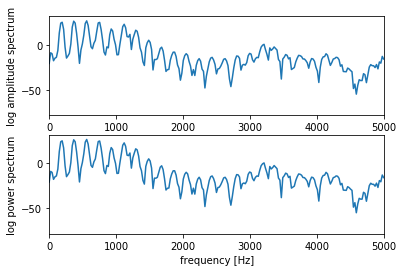

In [35]:
#音楽の対数スペクトラム
Adftlog=20*np.log10(Adft)
Pdftlog=10*np.log10(Pdft)

plt.subplot(2,1,1)
plt.plot(fscale[0:int(n/2)],Adftlog[0:int(n/2)])
plt.xlabel('frequency[Hz]')
plt.ylabel('log amplitude spectrum')
plt.xlim(0,5000)

plt.subplot(2,1,2)
plt.plot(fscale[0:int(n/2)],Pdftlog[0:int(n/2)])
plt.xlabel('frequency [Hz]')
plt.ylabel('log power spectrum')
plt.xlim(0,5000)

plt.show()

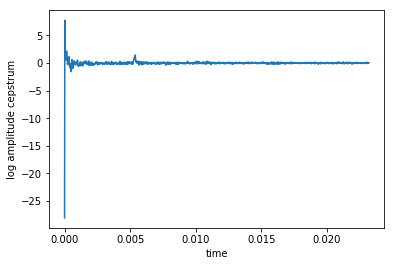

In [37]:
#ケプストラム分析
cps=np.real(np.fft.ifft(Adftlog))
quefrency=time-min(time)

plt.plot(quefrency[0:int(n/2)],cps[0:int(n/2)])
plt.xlabel('time')
plt.ylabel('log amplitude cepstrum')
plt.show()

D:\python\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


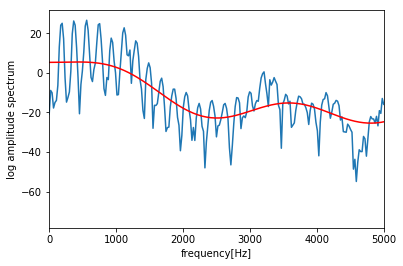

In [40]:
#ローパスリフター
cepcoef=20 #ケプストラム次数
cpslif=np.array(cps)
#高周波成分を除く
cpslif[cepcoef:len(cpslif)-cepcoef+1]=0

#ケプストラム領域をフーリエ変換してスペクトル領域に戻す
dftspc=np.fft.fft(cpslif,n)

#original
plt.plot(fscale[0:int(n/2)],Adftlog[0:int(n/2)])

#高周波成分を除く
plt.plot(fscale[0:int(n/2)],dftspc[0:int(n/2)],c='red')
plt.xlabel('frequency[Hz]')
plt.ylabel('log amplitude spectrum')
plt.xlim(0,5000)
plt.show()
